features: http://mt.google.com/vt/lyrs=m&x=2648&y=2959&z=13
RGB http://mt.google.com/vt/lyrs=s&x=2648&y=2959&z=13


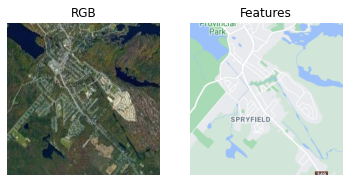

[[ 24 128  56 255]
 [ 50 143  79 255]
 [ 76 157 101 255]
 [103 117 134 255]
 [114  63  43 255]
 [127 186 145 255]
 [140 150 163 255]
 [156 192 249 255]
 [160 195 247 255]
 [160 201 228 255]
 [163 197 245 255]
 [164 209 207 255]
 [168 218 181 255]
 [170 202 241 255]
 [176 183 192 255]
 [177 207 237 255]
 [179 221 190 255]
 [180 209 235 255]
 [189 221 199 255]
 [190 217 229 255]
 [191 214 252 255]
 [196 230 205 255]
 [200 224 223 255]
 [204 219 242 255]
 [206 228 219 255]
 [209 230 217 255]
 [213 216 219 255]
 [215 229 222 255]
 [218 232 225 255]
 [221 236 227 255]
 [224 233 230 255]
 [225 236 254 255]
 [226 228 232 255]
 [229 231 234 255]
 [229 244 233 255]
 [232 234 237 255]
 [234 236 239 255]
 [237 239 241 255]
 [243 244 245 255]
 [248 249 250 255]
 [251 252 252 255]
 [254 254 254 255]
 [255 255 255 255]]
classes (43, 4)
[ 7  7  7 ... 25 25 25]
arr_classes (65536,)


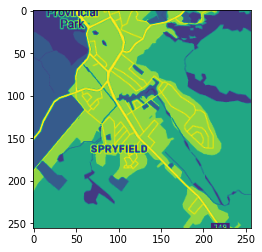

(256, 256, 3)
(256, 256, 4)
(65536, 3)
(65536, 4)


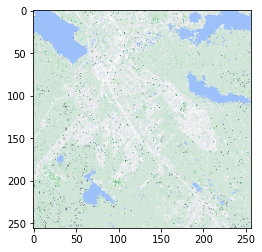

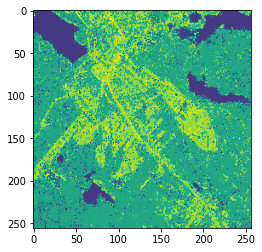

In [12]:
import tensorflow as tf
import numpy as np
import urllib.request
import os


####### SET SOME URLS 

x,y,z = 1,1,1
x,y,z = 3,2,2
x,y,z = 10,25,25
x,y,z = 2648,2959,13 #spryfield
TOKEN = 'pk.eyJ1Ijoicm5zcmciLCJhIjoiZTA0NmIwY2ZkYWJmMGZmMTAwNDYyNzdmYzkyODQyNDkifQ.djD5YCQzikYGFBo8pwiaNA' # be nice!
#url_RGB = f'http://otile1.mqcdn.com/tiles/1.0.0/osm/${z}/${x}/${y}.png'.replace('$','')
#url_features = f'http://otile1.mqcdn.com/tiles/1.0.0/osm/${z}/${x}/${y}.png'.replace('$','')

url_RGB = f'http://mt.google.com/vt/lyrs=s&x=${x}&y=${y}&z=${z}'.replace('$','')
url_features = f'http://mt.google.com/vt/lyrs=m&x=${x}&y=${y}&z=${z}'.replace('$','')

#url_features = f'https://a.tile.openstreetmap.org/${z}/${x}/${y}.png'.replace('$','')

#url_RGB = f'https://api.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}.png?access_token={TOKEN}'

headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}
print('features:', url_features)
print('RGB', url_RGB)

#### GRAB SOME TILES
import requests
import imageio

res_features = requests.get(url_features, stream = True, headers=headers)
res_RGB = requests.get(url_RGB, stream = True, headers=headers) 

img_features = imageio.imread(res_features.content)
img_RGB = imageio.imread(res_RGB.content)

#### DIPLAY THE TILES
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img_RGB);ax1.axis('off');ax1.set_title('RGB')
ax2.imshow(img_features);ax2.axis('off');ax2.set_title('Features')
plt.show()


#### REMAP THE LABELS TO CLASSES

import numpy as np

# classes = np.unique(img_features.reshape(-1, img_features.shape[2]), axis=0)

classes,arr_classes =  np.unique(img_features.reshape(-1, img_features.shape[2]), axis=0, return_inverse=True)


print(classes)
print('classes',classes.shape)

print(arr_classes)
print('arr_classes',arr_classes.shape)

img_classes = np.reshape(arr_classes,(256,256))
plt.imshow(img_classes)
plt.show()

# lut = np.array(Image.open('images/lut.png'))[0] # note reduction in dimensions to save a [0] inside the take()
# data = np.array(Image.open('images/thermal_gray.jpg'))
# data_colour = np.zeros(img_features + (1,))
#data_colour = np.take(img_features,classes, axis=2)


'''

img_features_hash = np.prod(img_features, axis=2)
classes = np.unique(img_features_hash)
plt.imshow(img_features_hash)
plt.show

#classes = np.unique(img_features.reshape(-1, img_features.shape[2]), axis=0)
print(classes)
print('classes',classes.shape)

img_classes = classes[img_features_hash]'''


# img_features=classid[img_features]

'''
rgb_array = np.zeros(label_array.shape + (3,), dtype=np.uint8)
rgb_array = np.take(lut_label, label_array, axis=0, out=rgb_array)
'''
'''
lut_rgb = classes

def rgb2label(rgb_array):
  def indexLUT(rgb_array):
    return lut_rgb[tuple(rgb_array)]
  label_array = np.apply_along_axis(indexLUT, 2, rgb_array)
  return label_array

img_classes = rgb2label(img_features)


plt.imshow(img_classes)
plt.show()'''


from sklearn.ensemble import GradientBoostingClassifier

print(img_RGB.shape)
print(img_features.shape)

arr_RGB = img_RGB.reshape(-1, img_RGB.shape[-1])
arr_features = img_features.reshape(-1, img_features.shape[-1])

img_features = img_features[:,:,0]

arr_RGB_subsample = arr_RGB[::100]
arr_classes_subsample = arr_classes[::100]

print(arr_RGB.shape)
print(arr_features.shape)
'''
classModel = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1,
                                  max_depth=1, random_state=0,verbose=1).fit(arr_RGB_subsample, arr_classes_subsample)'''


arr_classes_model = classModel.predict(arr_RGB)

arr_label_model = classes[arr_classes_model]
img_label_model = np.reshape(arr_label_model,(256,256,4))
plt.imshow(img_label_model)
plt.show()

img_classes_model = np.reshape(arr_classes_model,(256,256))


plt.imshow(img_classes_model)
plt.show()

#https://stackoverflow.com/questions/28476117/easy-openstreetmap-tile-displaying-for-python
#https://stackoverflow.com/questions/24780697/numpy-unique-list-of-colors-in-the-image
